# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'
conn_str = f'postgresql://{postgres_user}:{postgres_pw}@{postgres_host}:{postgres_port}/{postgres_db}'
query = '''
SELECT *
FROM heartdisease
'''
heartdisease_df = pd.read_sql_query(query, con=conn_str)
heartdisease_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
# preprocessing
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by `?`) with a `0`
X = X.replace(to_replace='?', value=0)

# Binarize y so that `1` means heart disease diagnosis and `0` means no diagnosis
y = np.where(y > 0, 0, 1)

# normalize data
scaled_X = StandardScaler().fit_transform(X)

---
1. Produce dendrograms for the heart disease dataset. Use three different linkage methods: complete, average, and ward. Which linkage method do you think produces the most reasonable result?

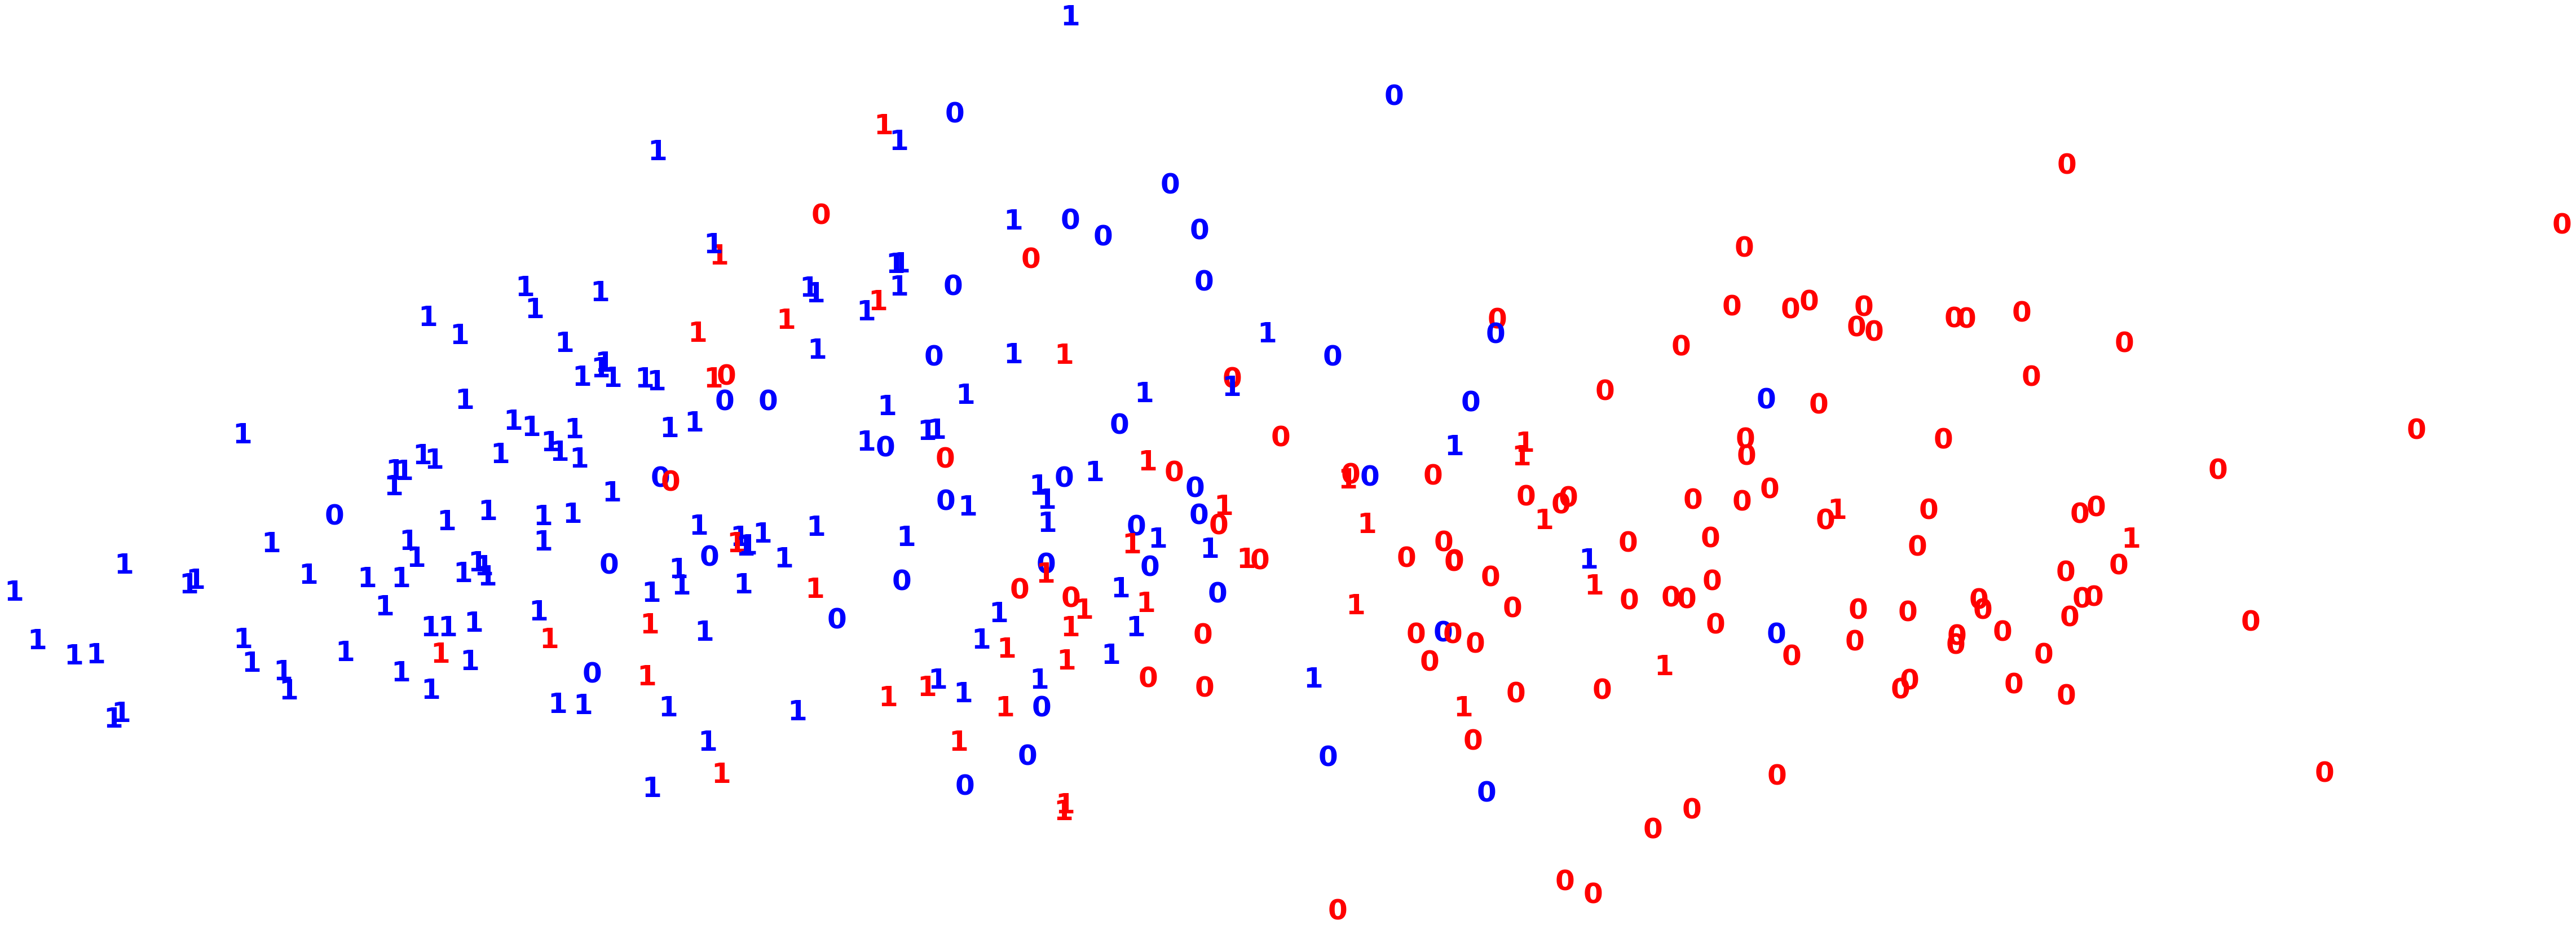

In [4]:
# agglomerative clustering complete method
agg_cluster = AgglomerativeClustering(
    linkage='complete',
    affinity='cosine',
)

# fit the model
clusters_comp = agg_cluster.fit_predict(scaled_X)

# pca for model visualization
pca_comp = PCA(n_components=2).fit_transform(scaled_X)


plt.figure(figsize=(10,4))
colours = 'rbg'
for i in range(pca_comp.shape[0]):
    plt.text(pca_comp[i, 0], pca_comp[i, 1], str(clusters_comp[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

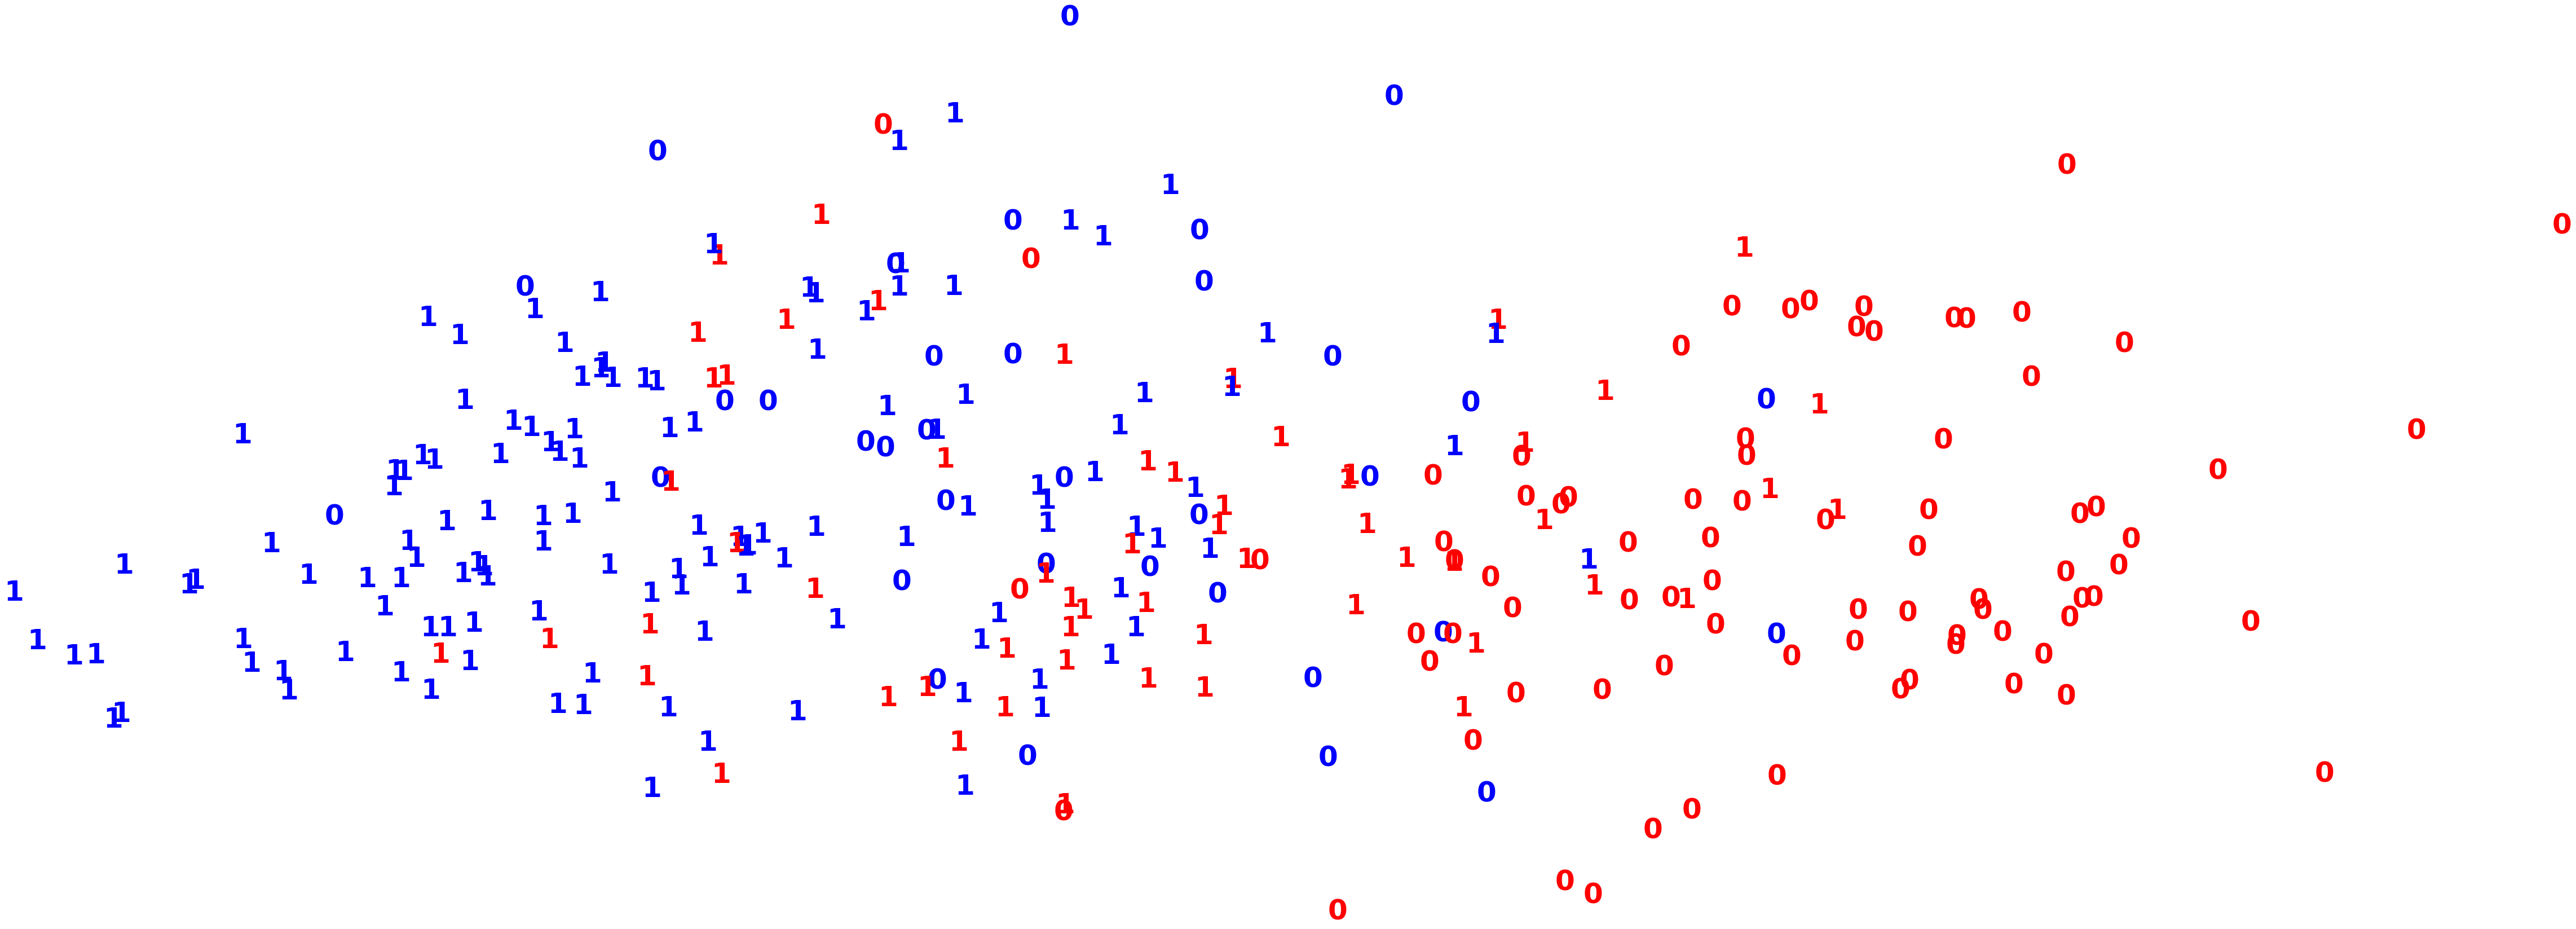

In [5]:
# agglomerative clustering ward method
agg_cluster = AgglomerativeClustering(
    linkage='ward',
    affinity='euclidean',
)

# fit the model
clusters_ward = agg_cluster.fit_predict(scaled_X)

# pca for model visualization
pca_ward = PCA(n_components=2).fit_transform(scaled_X)


plt.figure(figsize=(10,4))
colours = 'rbg'
for i in range(pca_ward.shape[0]):
    plt.text(pca_ward[i, 0], pca_ward[i, 1], str(clusters_ward[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

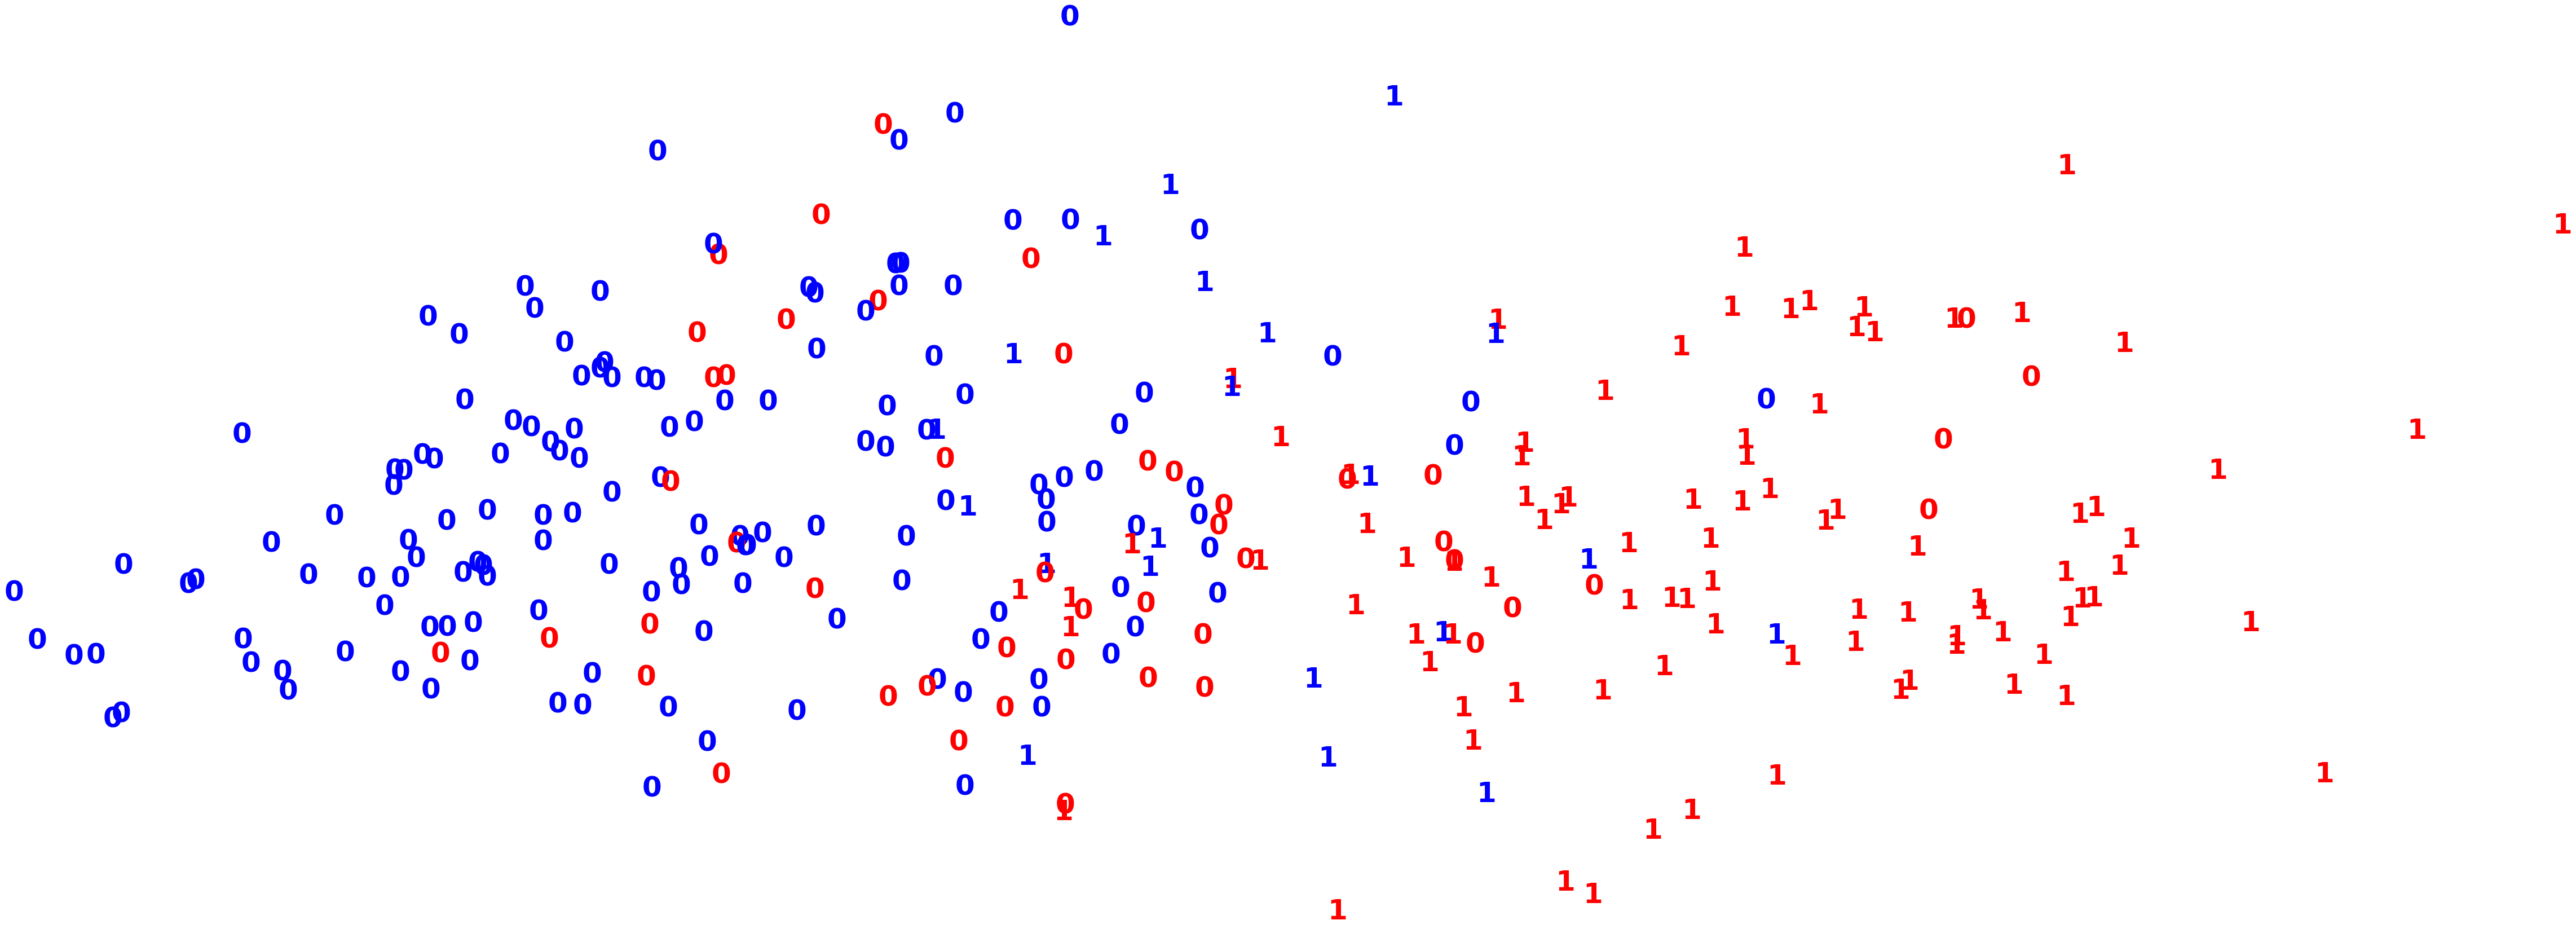

In [6]:
# agglomerative clustering average method
agg_cluster = AgglomerativeClustering(
    linkage='average',
    affinity='cosine',
)

# fit the model
clusters_avg = agg_cluster.fit_predict(scaled_X)

# pca for model visualization
pca_avg = PCA(n_components=2).fit_transform(scaled_X)


plt.figure(figsize=(10,4))
colours = 'rbg'
for i in range(pca_avg.shape[0]):
    plt.text(pca_avg[i, 0], pca_avg[i, 1], str(clusters_avg[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

average


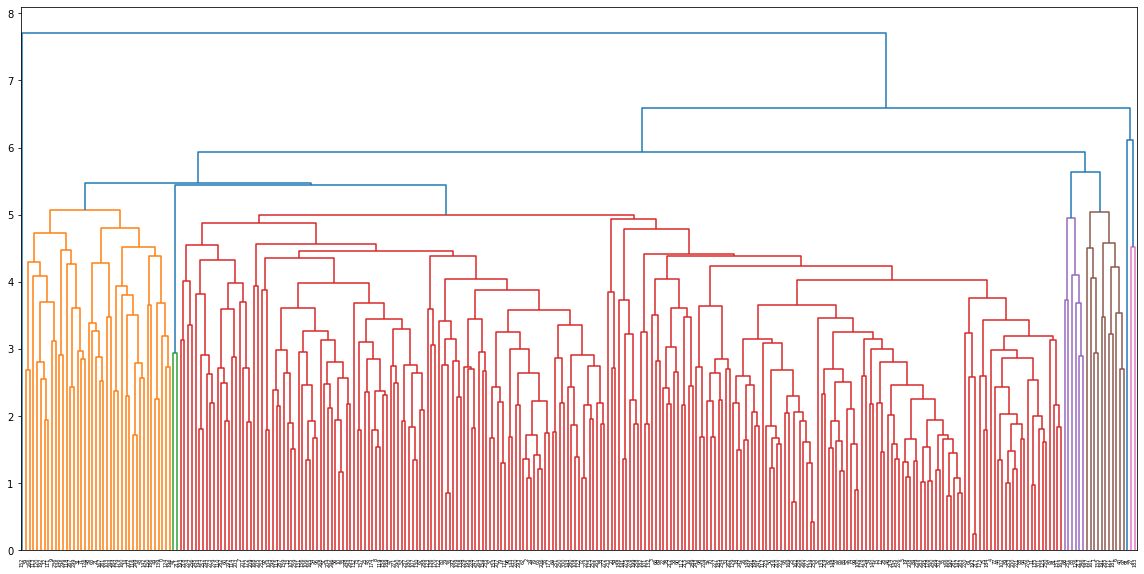

complete


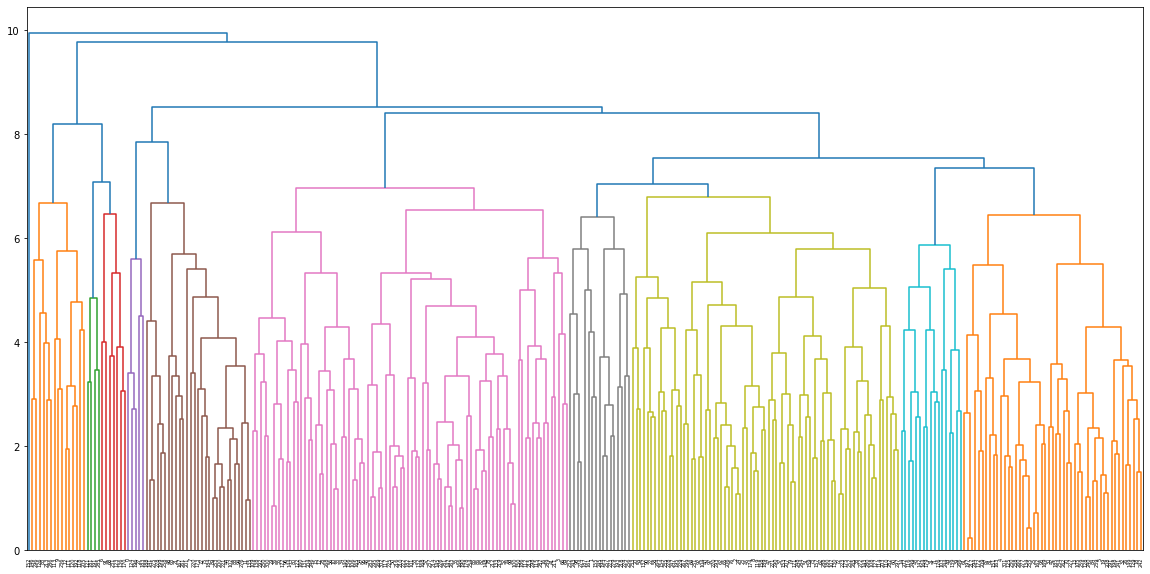

ward


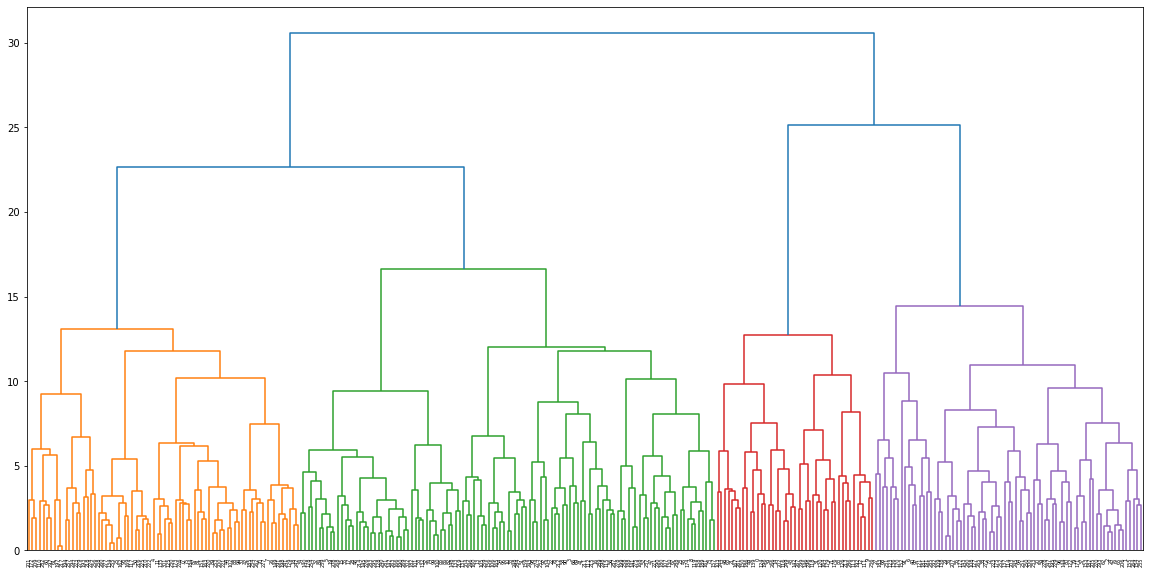

In [7]:
# average method dendrogram
plt.figure(figsize=(20,10))
dendrogram(linkage(scaled_X, method='average'))
print('average')
plt.show()

# complete method dendrogram
plt.figure(figsize=(20,10))
dendrogram(linkage(scaled_X, method='complete'))
print('complete')
plt.show()

# ward dendrogram
plt.figure(figsize=(20,10))
dendrogram(linkage(scaled_X, method='ward'))
print('ward')
plt.show()

> either the complete or the ward linkage looks to produce the best results

---
2. Apply agglomerative clustering to the heart disease data by setting n_clusters=2. Try the three linkage methods above, and get ARI and silhouette scores for each of your solutions. Compare the results with each other. Then compare the results with the results from the k-means solution that you implemented in the previous checkpoint's assignment. Which algorithm and setting perform better?

In [8]:
linkages = ['average', 'complete', 'ward']
affinities = ['cosine', 'cosine', 'euclidean']
for i in range(3):
    # agglomerative clustering method
    agg_cluster = AgglomerativeClustering(
        linkage=linkages[i],
        affinity=affinities[i],
        n_clusters=2
    )
    # fit the model
    clusters = agg_cluster.fit_predict(scaled_X)
    
    print("\n"+linkages[i])
    # ARI score
    print(f"ARI: {metrics.adjusted_rand_score(y, clusters)}")
          
    # silhouette score
    print(f"silhoutte score: {metrics.silhouette_score(scaled_X, clusters, metric=affinities[i])}")


average
ARI: 0.2940490133353465
silhoutte score: 0.23325509557943136

complete
ARI: 0.21394030618551016
silhoutte score: 0.1900255356793155

ward
ARI: 0.146129913123814
silhoutte score: 0.1387197366557222


> the average minkage with the cosine distance measure performed the best